# ДЗ по "Библиотеки Python для Data Science: Numpy, Matplotlib, Scikit-learn"
##  Видеоурок 4. Визуализация данных в Matplotlib.
* Домашнее задание:  
[Практическое задание](https://gbcdn.mrgcdn.ru/uploads/asset/5788494/attachment/c94a5de584715fcc5ef99b652ec48639.pdf).

## Тема “Визуализация данных в Matplotlib”

In [4]:
# Устанавливаем пакеты есои они не установлены
# !pip install matplotlib

### Задание 1
- Загрузите модуль pyplot библиотеки matplotlib с псевдонимом plt, а также библиотеку numpy с псевдонимом np.
- Примените магическую функцию %matplotlib inline для отображения графиков в Jupyter Notebook и настройки конфигурации ноутбука со значением 'svg' для более четкого отображения графиков.
- Создайте список под названием x с числами 1, 2, 3, 4, 5, 6, 7 и список y с числами 3.5, 3.8, 4.2, 4.5, 5, 5.5, 7.
- С помощью функции plot постройте график, соединяющий линиями точки с горизонтальными координатами из списка x и вертикальными из списка y.
- Затем в следующей ячейке постройте диаграмму рассеяния (другие названия - диаграмма разброса, scatter plot).

In [6]:
# Загружаем необходимые библиотеки
from matplotlib import pyplot as plt
import numpy as np

# Следующая магическая команда Jupyter Notebook нужна для того, чтобы графики отображались прямо в ноутбуке, а не в отдельном окне
%matplotlib inline

In [8]:
# Зададим точки x и y
x = [1, 2, 3, 4, 5, 6, 7]
y = [3.5, 3.8, 4.2, 4.5, 5, 5.5, 7]

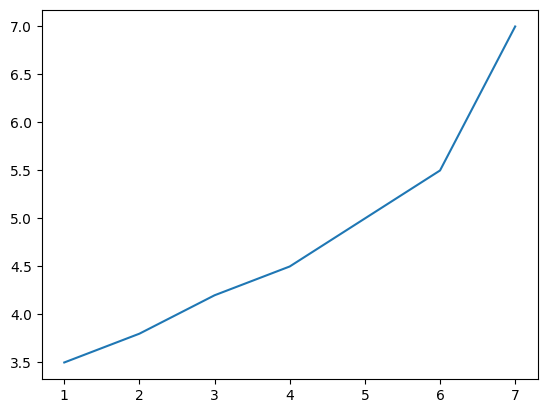

In [10]:
# Постром график
plt.plot(x, y)
plt.show()

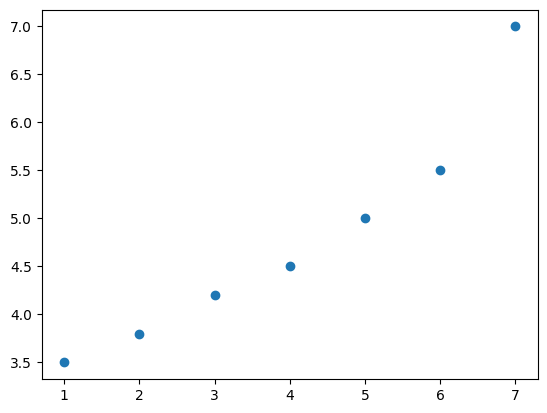

In [13]:
# Построим диаграмму рассеяния (расброса)
plt.scatter(x, y)
plt.show()